In [1]:
!python -m pip install pandas
!python -m pip install matplotlib
!python -m pip install numpy

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------  7.9/8.0 MB 45.5 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 45.5 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 45.5 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 45.5 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 45.5 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 7.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------------- - 2.1/2.2 MB 53.7 MB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 53.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------------------ --- 2.4/2.6 MB 51.1 MB/s eta 0:00:01
   ----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import numpy as np

In [3]:
from sklearn.linear_model import SGDClassifier

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X = mnist['data']
print("x", X)
y = mnist['target']
print("y", y)


x        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixe

In [7]:
print("x:", X.shape)
print("y:", y.shape)

x: (70000, 784)
y: (70000,)


In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [9]:
!python -m pip install numpy scikit-learn matplotlib seaborn -y


Usage:   
  c:\Users\mathi\AppData\Local\Programs\Python\Python313\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Users\mathi\AppData\Local\Programs\Python\Python313\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Users\mathi\AppData\Local\Programs\Python\Python313\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Users\mathi\AppData\Local\Programs\Python\Python313\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Users\mathi\AppData\Local\Programs\Python\Python313\python.exe -m pip install [options] <archive url/path> ...

no such option: -y


In [10]:
mnist["data"]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# y = x + a 
X = mnist["data"]
y = mnist["target"]

In [12]:
# 28 x 28 = 784
print("X :",X.shape)
print("y :",y.shape)

X : (70000, 784)
y : (70000,)


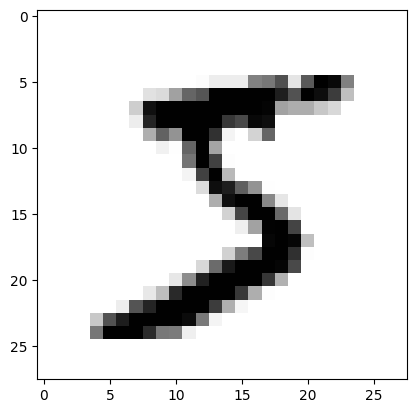

In [13]:
# convert to np array 
X_array = np.array(X)
y_array = np.array(y)

first_image = X_array[0].reshape(28,28)

plt.imshow(first_image, cmap = mpl.cm.binary, interpolation="nearest")

In [14]:
# check if the y corresponds to the image  
y_array[0]

'5'

In [15]:
# division of the dataset into training and test set with 56000 and 14000 samples respectively (80% and 20%)
X_train, X_test, y_train, y_test = X_array[:56000], X_array[56000:], y_array[:56000], y_array[56000:]

In [16]:
# classification binaire pour le chiffre 5
y_train_5 = (y_train == '5')
print(y_train_5)

[ True False False ... False False False]


In [17]:
y_test_5 = (y_test == '5')
print(y_test_5)

[False False  True ... False  True False]


In [18]:
# y = x + a 
# {yes: if equal5, no: if not equal5} = x + a 
sgd_clf = SGDClassifier( max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [20]:
sgd_clf.predict([X_array][0])

array([ True, False, False, ..., False,  True, False], shape=(70000,))

In [26]:
from sklearn.model_selection import StratifiedKFold

from sklearn.base import clone

In [27]:
k_fold = StratifiedKFold(n_splits=3)
X_train, y_train_5
for i_train, i_test in k_fold.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) 
    X_train_folds = X_train[i_train]
    y_train_folds = y_train_5[i_train]
    X_test_fold = X_train[i_test]
    y_test_fold = y_train_5[i_test]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) 
   

0.9595542936733272
0.9608399850002679
0.9566591663988
